Набор данных sentiment140. Он содержит 1 600 000 твитов, извлеченных с помощью api Twitter . Твиты снабжены комментариями (0 = отрицательные, 4 = положительные), и их можно использовать для определения настроений.

Он содержит следующие 6 полей:

 цель(target): полярность твита (0 = отрицательная, 2 = нейтральная, 4 = положительная)

 идентификаторы(ids): Идентификатор твита ( 2087)

 дата(date): дата публикации твита (сб. 16 мая 23:58:44 UTC 2009)

 флаг(flag): Запрос (lyx). Если запроса нет, то это значение равно NO_QUERY.

 пользователь(user): пользователь, который написал твит (robotickilldozr)

 текст(text): текст твита (Lyx - это круто)

In [1]:
pip install catboost lightgbm xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


🚀 ЗАПУСК АНАЛИЗА ТОНАЛЬНОСТИ ТВИТОВ

📊 1. Загрузка данных...
 Загружено твитов: 30000

🔧 2. Предобработка текста...
 После очистки: 29824 твитов

⚖ 3. Анализ баланса классов...
 Распределение: {1: 11921, 0: 11938}
 Коэффициент дисбаланса: 1.00
 Рекомендация: F1-score (сбалансированные классы)

🔡 4. Векторизация текста...
 Размерность признаков: (23859, 5000)

🤖 5. Обучение моделей с подбором параметров...
🎯 Начинаем подбор гиперпараметров...
🔍 Подбор параметров для XGBClassifier...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
✅ XGBoost: 0.7409 за 250.7с
🔍 Подбор параметров для LGBMClassifier...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
✅ LightGBM: 0.7402 за 113.7с
🔍 Подбор параметров для CatBoostClassifier...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
✅ CatBoost: 0.7428 за 365.6с
🔍 Подбор параметров для SVC...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
✅ Linear SVM: 0.7469 за 2514.8с
🔍 Подбор параметров для RandomFore

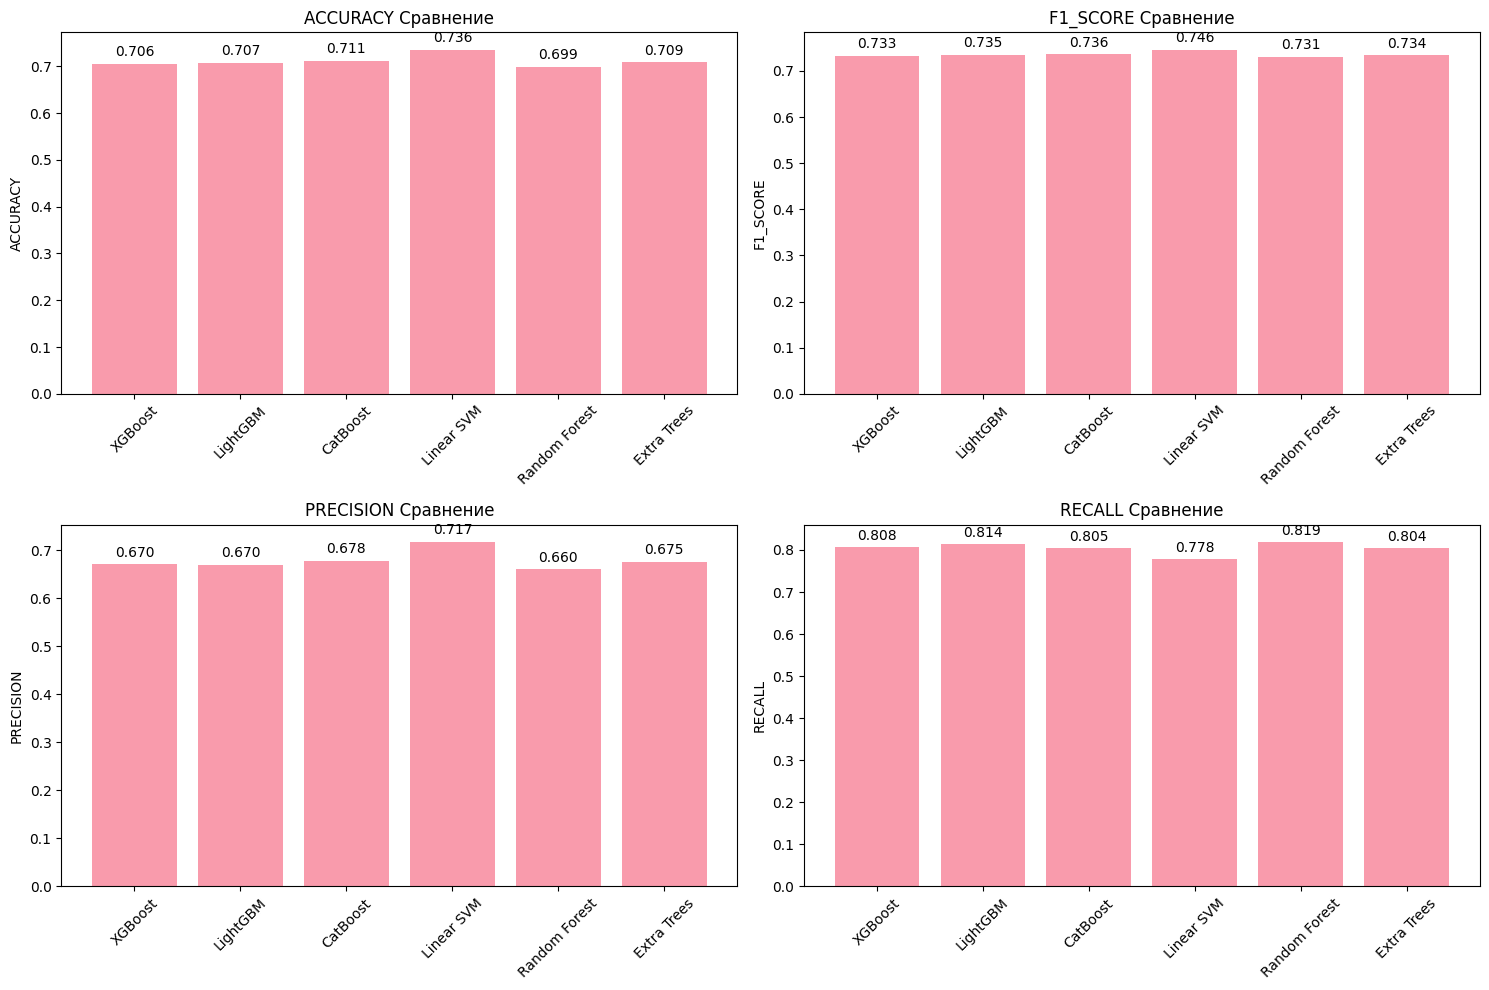

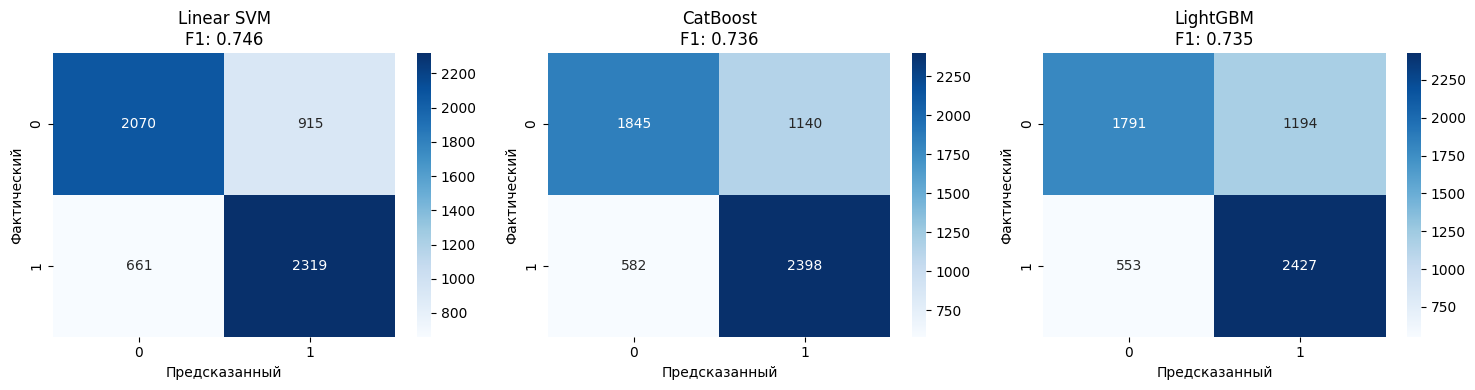

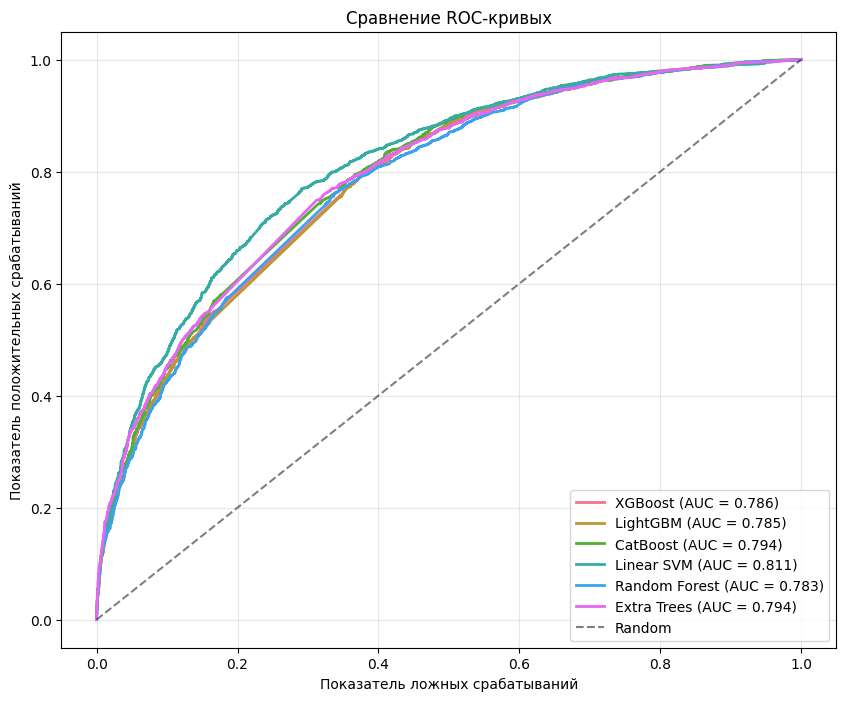


📋 8. Генерация отчетов...
        Model Tuned Accuracy F1-Score Precision Recall ROC-AUC CV Mean Time (s)
      XGBoost     ✓   0.7056   0.7327    0.6705 0.8077  0.7865  0.7409     19.5
     LightGBM     ✓   0.7071   0.7353    0.6703 0.8144  0.7851  0.7402      4.4
     CatBoost     ✓   0.7113   0.7358    0.6778 0.8047  0.7936  0.7428     33.7
   Linear SVM     ✓   0.7358   0.7464    0.7171 0.7782  0.8106  0.7469    262.9
Random Forest     ✓   0.6989   0.7310    0.6602 0.8188  0.7834  0.7399      2.3
  Extra Trees     ✓   0.7088   0.7340    0.6751 0.8040  0.7937  0.7429      1.8

📊 ФИНАЛЬНЫЙ ОТЧЕТ
  ✓ XGBoost         | F1: 0.7327 | Acc: 0.7056 | AUC: 0.7865 | Time: 19.5s
  ✓ LightGBM        | F1: 0.7353 | Acc: 0.7071 | AUC: 0.7851 | Time: 4.4s
  ✓ CatBoost        | F1: 0.7358 | Acc: 0.7113 | AUC: 0.7936 | Time: 33.7s
🏆 ✓ Linear SVM      | F1: 0.7464 | Acc: 0.7358 | AUC: 0.8106 | Time: 262.9s
  ✓ Random Forest   | F1: 0.7310 | Acc: 0.6989 | AUC: 0.7834 | Time: 2.3s
  ✓ Extra Trees     

In [2]:
import os
import sys
import warnings

warnings.filterwarnings("ignore")
from balancer import DataBalancer
from data_loader import DataLoader
from evaluator import ModelEvaluator
from helpers import predict_sentiment, save_model
from logger import ExperimentLogger
from metrics_analyzer import MetricsAnalyzer
from model_trainer import AdvancedModelTrainer
from preprocessor import TextPreprocessor
from report_generator import ReportGenerator
from settings import config
from vectorizer import TextVectorizer
from visualizer import ResultsVisualizer


def main():
    """Основная функция"""
    print("\U0001f680 ЗАПУСК АНАЛИЗА ТОНАЛЬНОСТИ ТВИТОВ")
    print("=" * 50)

    # Инициализация компонентов
    data_loader = DataLoader()
    preprocessor = TextPreprocessor()
    balancer = DataBalancer()
    vectorizer = TextVectorizer()
    trainer = AdvancedModelTrainer()
    logger = ExperimentLogger(config.EXPERIMENT_LOG_PATH)

    # 1. Загрузка и подготовка данных
    print("\n\U0001f4ca 1. Загрузка данных...")
    df = data_loader.load_data(sample_size=30000)
    print(f" Загружено твитов: {len(df)}")

    # 2. Предобработка текста
    print("\n\U0001f527 2. Предобработка текста...")
    df_clean = preprocessor.preprocess_dataframe(df, "text")
    print(f" После очистки: {len(df_clean)} твитов")

    # 3. Разделение данных
    X_train, X_test, y_train, y_test = data_loader.get_train_test_split(
        df_clean, "cleaned_text", "target"
    )

    # 4. Анализ баланса классов
    print("\n\U00002696 3. Анализ баланса классов...")
    balance_info = balancer.analyze_class_balance(y_train)
    print(f" Распределение: {balance_info['class_distribution']}")
    print(f" Коэффициент дисбаланса: {balance_info['imbalance_ratio']:.2f}")
    print(f" Рекомендация: {balance_info['recommendation']}")

    # 5. Векторизация
    print("\n\U0001f521 4. Векторизация текста...")
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    print(f" Размерность признаков: {X_train_vec.shape}")

    # 6. Обучение моделей
    print("\n\U0001f916 5. Обучение моделей с подбором параметров...")
    results = trainer.train_models(
        X_train_vec, y_train, X_test_vec, y_test, tune_hyperparameters=True
    )

    # 7. Выбор лучшей модели
    print("\n\U0001f3c6 6. Выбор лучшей модели...")
    best_name, best_result = trainer.get_best_model("f1_score")
    print(f" Лучшая модель: {best_name}")
    print(f" F1-Score: {best_result['metrics']['f1_score']:.4f}")
    print(f" Accuracy: {best_result['metrics']['accuracy']:.4f}")

    # 8. Визуализация результатов
    print("\n\U0001f4c8 7. Визуализация результатов...")
    visualizer = ResultsVisualizer()
    visualizer.plot_model_comparison(results)
    visualizer.plot_confusion_matrices(results, y_test, top_n=3)

    # 9. ROC-кривые
    evaluator = ModelEvaluator(y_test)
    evaluator.plot_roc_curves(results)

    # 10. Детальный отчет
    print("\n\U0001f4cb 8. Генерация отчетов...")
    report_df = ReportGenerator.generate_performance_report(results)
    print(report_df.to_string(index=False))
    ReportGenerator.print_final_report(results, best_name)

    # 11. Сохранение модели
    print("\n\U0001f4be 9. Сохранение лучшей модели...")
    model_data = {
        "model": best_result["model"],
        "vectorizer": vectorizer.vectorizer,
        "preprocessor": preprocessor,
        "metrics": best_result["metrics"],
        "model_name": best_name,
        "feature_names": vectorizer.get_feature_names(),
        "config": {
            "sample_size": len(df),
            "vectorizer_type": config.features.VECTORIZER_TYPE,
            "balance_strategy": config.data.BALANCE_STRATEGY,
        },
    }
    save_model(model_data, config.MODEL_SAVE_PATH)

    # 12. Логирование эксперимента
    logger.log_experiment(
        {
            "best_model": best_name,
            "best_f1_score": best_result["metrics"]["f1_score"],
            "best_accuracy": best_result["metrics"]["accuracy"],
            "total_models_trained": len(results),
            "training_time_total": sum(r["training_time"] for r in results.values()),
        }
    )

    # 13. Демонстрация работы
    print("\n\U0001f50d 10. Тестирование на примерах...")
    test_tweets = [
        "I love this product! It's absolutely amazing!",
        "This is terrible and awful experience.",
        "The service was okay, nothing special.",
        "Highly recommended! Best purchase ever!",
        "Waste of money, completely disappointed.",
    ]
    for tweet in test_tweets:
        result = predict_sentiment(
            tweet, best_result["model"], vectorizer, preprocessor
        )
        icon = "\U0001f60a" if result["sentiment"] == "Positive" else "\U0001f61e"
        print(f"{icon} {result['sentiment']:8} ({result['confidence']:.1%}): {tweet}")
    print("\n\U00002705 АНАЛИЗ ЗАВЕРШЕН УСПЕШНО!")


if __name__ == "__main__":
    main()